# 3. Diving deep into the Twitter API

Dalam bab ini, Anda akan menambah pengetahuan Anda tentang berinteraksi dengan API secara mendalam ke dalam API streaming Twitter. Anda akan belajar cara melakukan streaming data Twitter real-time, dan bagaimana menganalisis dan memvisualisasikannya.

## The Twitter API and Authentication

### API Authentication

Paket `tweepy` hebat dalam menangani semua detail Twitter API OAuth Authentication untuk Anda. Yang perlu Anda lakukan adalah menambahkan kredensial autentikasi Anda. Dalam latihan interaktif ini, kami telah membuat beberapa kredensial otentikasi tiruan (jika Anda ingin mereplikasi ini di rumah, Anda perlu membuat [Aplikasi Twitter](https://apps.twitter.com/) seperti yang dijelaskan Hugo dalam video). Tugas Anda adalah meneruskan kredensial ini ke penangan OAuth tweepy.

In [3]:
# !pip install tweepy

In [4]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### Streaming tweets

Sekarang setelah Anda mengatur kredensial otentikasi Anda, saatnya untuk melakukan streaming beberapa tweet! Kami telah mendefinisikan *tweet stream listener class*, `MyStreamListener`, seperti yang dilakukan Hugo dalam video pengantar. Anda dapat menemukan kode untuk *tweet stream listener class* [di sini](https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4).

Tugas Anda adalah membuat objek `Stream` dan memfilter tweet sesuai dengan kata kunci tertentu.

In [5]:
# Stream listener
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

**Note** : Untuk dapat menjalankan kode berikut, lakukan pengaturan pada kredensial `auth` dari aplikasi Twitter anda. (Karena kredensial sebelumnya hanyalah tiruan dan tidak dapat digunakan)

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(['clinton', 'trump', 'sanders', 'cruz'])

### Load and explore your Twitter data

Sekarang setelah Anda memiliki data Twitter Anda yang tersimpan secara lokal dalam file teks, saatnya untuk menjelajahinya! Inilah yang akan Anda lakukan dalam beberapa latihan interaktif berikutnya. Dalam latihan ini, Anda akan membaca data Twitter menjadi `list`: `tweets_data`.

*Ketahuilah bahwa ini adalah data nyata dari Twitter dan karena itu selalu ada risiko bahwa data itu mungkin mengandung kata-kata tidak senonoh atau konten menyinggung lainnya (dalam latihan ini, dan setiap latihan berikut yang juga menggunakan data Twitter nyata).*

In [9]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets3.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### Twitter data to DataFrame

Sekarang Anda memiliki data Twitter dalam *list of dictionary*, `tweets_data`, di mana setiap dictionary berhubungan dengan satu tweet. Selanjutnya, Anda akan mengekstrak teks dan bahasa setiap tweet. Teks dalam tweet, `t1`, disimpan sebagai nilai `t1['text']`; sama halnya, bahasa disimpan dalam `t1['lang']`. Tugas Anda adalah membuat DataFrame di mana setiap baris adalah tweet dan kolomnya adalah `'text'` dan `'lang'`.

In [10]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
df.head()

,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,et
3,Your an idiot she shouldn't have tried to grab...,en
4,RT @AlanLohner: The anti-American D.C. elites ...,en


### A little bit of Twitter text analysis

Sekarang setelah Anda mengatur DataFrame dari tweet, Anda akan melakukan sedikit analisis teks untuk menghitung berapa banyak tweet yang mengandung kata `'clinton'`, `'trump'`, `'sanders'` dan `'cruz'`. Pada kode pra-latihan, kami telah mendefinisikan fungsi `word_in_text()`, berikut ini, yang akan memberi tahu Anda apakah argumen pertama (sebuah kata) muncul di dalam argumen ke-2 (tweet).

In [11]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

Anda akan beralih di baris DataFrame dan menghitung berapa banyak tweet yang mengandung setiap kata kunci! List dari objek untuk setiap kandidat telah diinisialisasi ke 0.

In [12]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

### Plotting your Twitter data

Sekarang Anda memiliki jumlah tweet yang menyebutkan setiap kandidat, Anda dapat memplot grafik batang dari data ini. Anda akan menggunakan perpustakaan visualisasi data statistik `[seaborn](https://stanford.edu/~mwaskom/software/seaborn/)`, yang mungkin belum pernah Anda lihat sebelumnya, tetapi kami akan memandu Anda. Anda pertama-tama akan mengimpor `seaborn` sebagai `sns`. Anda kemudian akan membangun barplot data menggunakan `sns.barplot`, dengan memberikan dua argumen:

1. List dari labels
2. List yang berisi variabel yang ingin Anda plot (`clinton`, `trump`, dan sebagainya.)

Mudah-mudahan, Anda akan melihat bahwa Trump diwakili secara tidak masuk akal! Kami telah menjalankan solusi latihan sebelumnya di lingkungan Anda.

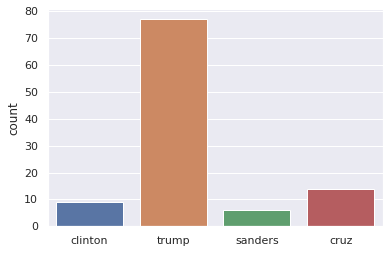

In [13]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()